# Lab-1

# Question-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv
from mpl_toolkits import mplot3d

In [2]:
theta = np.arange(-10,10+0.1, 0.1)

In [3]:
L_theta = np.square(theta)

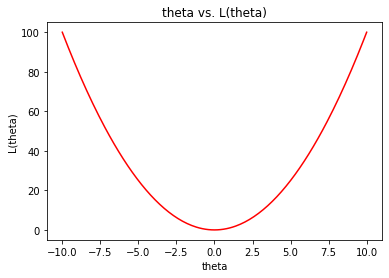

In [4]:
plt.plot(theta,L_theta, 'r')
plt.xlabel('theta')
plt.ylabel('L(theta)')
plt.title("theta vs. L(theta)")
plt.show()

### Minimum at theta=0



# Question-2

In [5]:
theta_1 = np.arange(-10, 10, 0.1)
theta_2 = np.arange(-10, 10, 0.1)


theta1, theta2 = np.meshgrid(theta_1, theta_2)


L_theta = np.zeros(shape = (len(theta_1), len(theta_2)))


for i in range(0, len(theta_1)):
    for j in range(0, len(theta_2)):
        L_theta[i][j]= theta_1[i]**2 + theta_2[j]**2

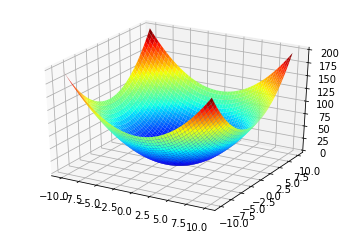

In [6]:
ax=plt.axes(projection='3d')

surf = ax.plot_surface(theta1, theta2, L_theta, cmap=cm.jet)

# Question-3

In [41]:
df = pd.read_csv('data_for_Problem1.csv')


In [82]:
X = df['x']
Y = df['y']

X=X.to_numpy()
Y=Y.to_numpy()

In [83]:
theta0 = np.arange(-30, 30+0.1, 1)
theta1 = np.arange(-10, 10+0.1, 1)
L = np.zeros((len(theta0), len(theta1)))
m = len(X)

In [84]:
X = (X - np.mean(X))/np.std(X)


In [85]:
for i, t0 in enumerate(theta0):
    for j, t1 in enumerate(theta1):
        for k in range(0, m):
            L[i, j] = L[i, j] + (Y[k] - (t0 + t1*X[k]))**2

T0, T1 = np.meshgrid(theta0, theta1)            

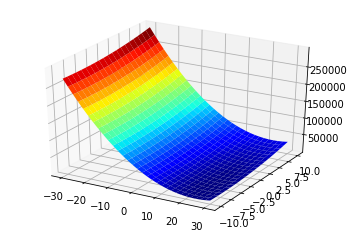

In [86]:
ax=plt.axes(projection='3d')

surf = ax.plot_surface(T0, T1, L.T, cmap=cm.jet)

# Question-4

In [135]:
l=len(X)
X0 = np.ones(shape=l)
X0=X0.reshape(l, 1)
X=X.reshape(l, 1)
Y=Y.reshape(l, 1)

In [136]:
K=np.hstack((X0, X))

In [137]:
pseudo = K.T.dot(K)
pseudo_inv = np.linalg.inv(pseudo)

In [138]:
theta_ans = pseudo_inv.dot(K.T).dot(Y)

In [139]:
theta_ans

array([[23.71808511],
       [-6.86699545]])

# Question-5

In [140]:
random_val = np.random.rand(2, 1)

In [142]:
np.sum((Y - K.dot(random_val))**2)

59015.43703026174

In [143]:
np.sum((Y - K.dot(theta_ans))**2)

1572.650366892292

##### The value of cost function for any value will always be greater than that of the cost function value corresponding to theta_ans